# California Housing Price Prediction Model

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load and read dataset
data = pd.read_csv('housing.csv')
data #view and get an idea of what we're working with

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Data Processing and Exploratory Data Analysis

In [3]:
data.info() #data types and any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True) #drop nan values and save

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'],axis=1) # Feature
y = data['median_house_value'] # Target variable

In [7]:
#Splitting dating 80/20 for the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
#Combining training data to observe any correlations
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10502,-117.70,33.47,21.0,2208.0,534.0,1423.0,482.0,3.5915,<1H OCEAN,305600.0
16876,-122.40,37.60,30.0,5351.0,1134.0,2558.0,1074.0,3.5817,NEAR OCEAN,369300.0
1029,-120.55,38.43,18.0,1564.0,357.0,618.0,277.0,2.3549,INLAND,108900.0
9832,-121.93,36.63,33.0,1740.0,342.0,638.0,329.0,3.1912,NEAR OCEAN,319800.0
10784,-117.91,33.63,32.0,1901.0,400.0,946.0,418.0,2.7264,<1H OCEAN,311100.0
...,...,...,...,...,...,...,...,...,...,...
1309,-121.83,38.00,8.0,2572.0,738.0,1384.0,684.0,1.7161,INLAND,75800.0
4384,-118.27,34.09,44.0,3646.0,912.0,1783.0,861.0,2.9709,<1H OCEAN,225000.0
17653,-121.88,37.25,24.0,968.0,240.0,631.0,250.0,2.8636,<1H OCEAN,240300.0
14450,-117.24,32.81,34.0,2420.0,391.0,917.0,392.0,6.5881,NEAR OCEAN,394400.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

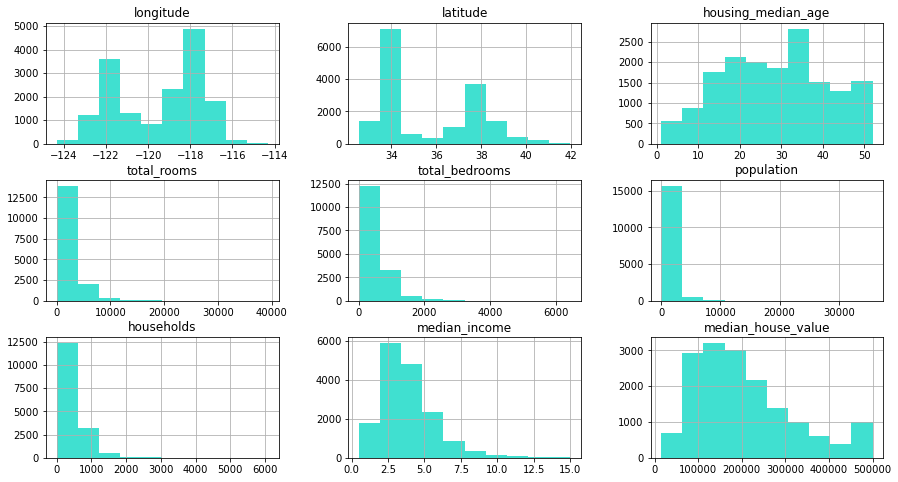

In [9]:
train_data.hist(figsize=(15,8), color="turquoise")

In [10]:
# training data correlations to get an idea of what to expect
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924865,-0.109679,0.050157,0.075131,0.103027,0.062587,-0.014268,-0.040017
latitude,-0.924865,1.000000,0.012739,-0.040901,-0.071458,-0.111094,-0.076889,-0.081342,-0.148708
housing_median_age,-0.109679,0.012739,1.000000,-0.357938,-0.320008,-0.292022,-0.301643,-0.112093,0.107642
total_rooms,0.050157,-0.040901,-0.357938,1.000000,0.930993,0.856478,0.918974,0.194938,0.129699
total_bedrooms,0.075131,-0.071458,-0.320008,0.930993,1.000000,0.875640,0.979057,-0.009209,0.045596
population,0.103027,-0.111094,-0.292022,0.856478,0.875640,1.000000,0.905796,0.004157,-0.027343
households,0.062587,-0.076889,-0.301643,0.918974,0.979057,0.905796,1.000000,0.011623,0.060819
median_income,-0.014268,-0.081342,-0.112093,0.194938,-0.009209,0.004157,0.011623,1.000000,0.691580
median_house_value,-0.040017,-0.148708,0.107642,0.129699,0.045596,-0.027343,0.060819,0.691580,1.000000


### Observing the heatmap below, we can see there is a strong correlation of 0.69 between our target variable, Median House Value, and Median Income

<AxesSubplot:>

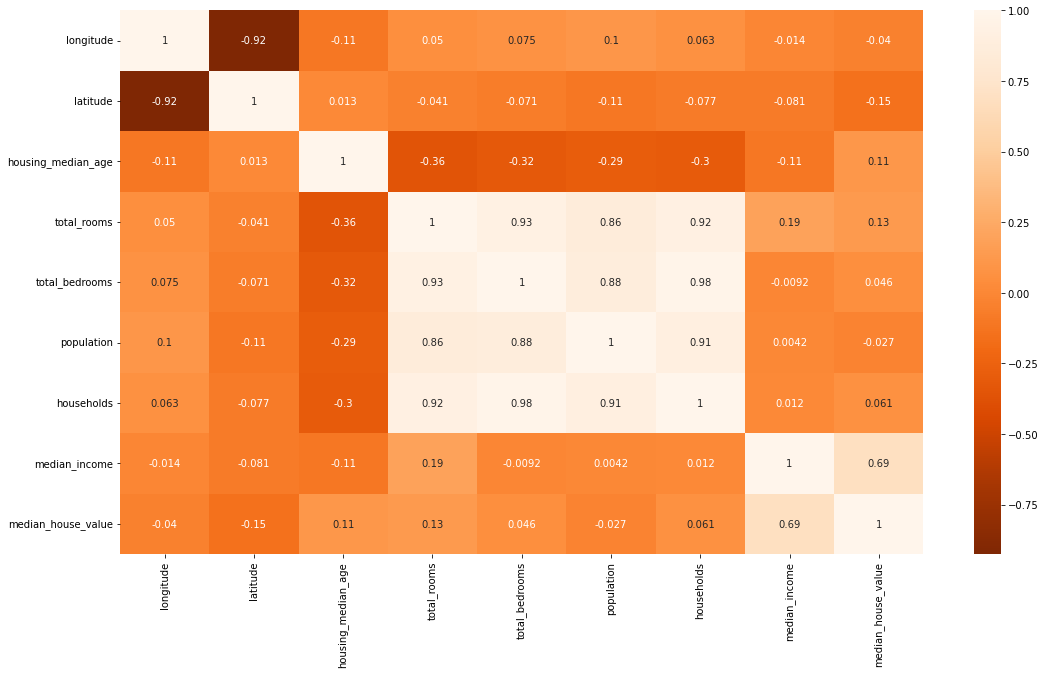

In [11]:
# Training data correlation heatmap
plt.figure(figsize=(18,10))
sns.heatmap(train_data.corr(), annot=True, cmap='Oranges_r')

In [12]:
# Log of features to observe distribution of them; easier to understand visually
# added + 1 to each one in order to prevent values of 0 (just in case)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

### Applying a log transformation compresses the range of the larger values, reducing skewness and making the distribution more symmetrical. As a result, the histogram after the log transformation tends to shift data that were previously skewed toward large values into a more normal distribution.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

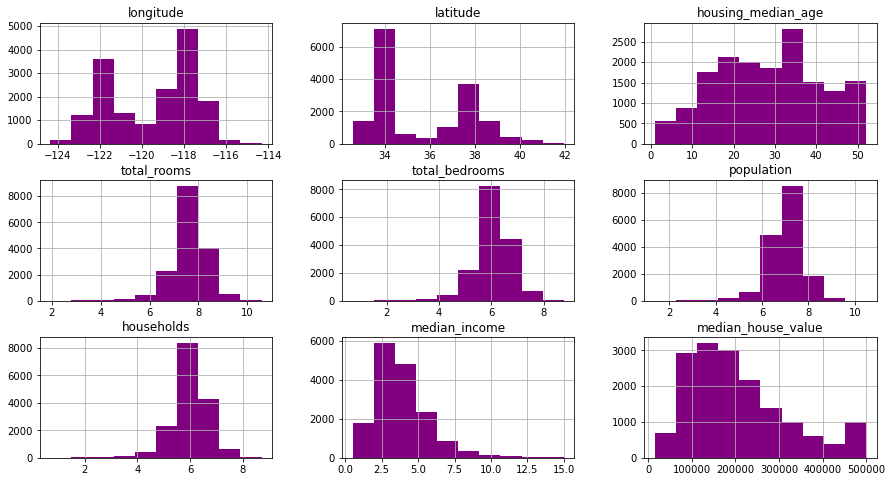

In [13]:
# Presents us with histrograms that look more normally distributed for better understanding
train_data.hist(figsize=(15,8), color='purple')

In [14]:
#One hot endcode Ocean Proximity column
#train_data.ocean_proximity.value_counts()
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10502,1,0,0,0,0
16876,0,0,0,0,1
1029,0,1,0,0,0
9832,0,0,0,0,1
10784,1,0,0,0,0
...,...,...,...,...,...
1309,0,1,0,0,0
4384,1,0,0,0,0
17653,1,0,0,0,0
14450,0,0,0,0,1


In [15]:
#Join one hot encoded values for ocean proximity and drop original column
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

### You can see below in the data frame that ocean proximity has been dropped and instead each of its original values have been altered into a binary state (1s and 0s).

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10502,-117.70,33.47,21.0,7.700295,6.282267,7.261225,6.180017,3.5915,305600.0,1,0,0,0,0
16876,-122.40,37.60,30.0,8.585226,7.034388,7.847372,6.980076,3.5817,369300.0,0,0,0,0,1
1029,-120.55,38.43,18.0,7.355641,5.880533,6.428105,5.627621,2.3549,108900.0,0,1,0,0,0
9832,-121.93,36.63,33.0,7.462215,5.837730,6.459904,5.799093,3.1912,319800.0,0,0,0,0,1
10784,-117.91,33.63,32.0,7.550661,5.993961,6.853299,6.037871,2.7264,311100.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,-121.83,38.00,8.0,7.852828,6.605298,7.233455,6.529419,1.7161,75800.0,0,1,0,0,0
4384,-118.27,34.09,44.0,8.201660,6.816736,7.486613,6.759255,2.9709,225000.0,1,0,0,0,0
17653,-121.88,37.25,24.0,6.876265,5.484797,6.448889,5.525453,2.8636,240300.0,1,0,0,0,0
14450,-117.24,32.81,34.0,7.791936,5.971262,6.822197,5.973810,6.5881,394400.0,0,0,0,0,1


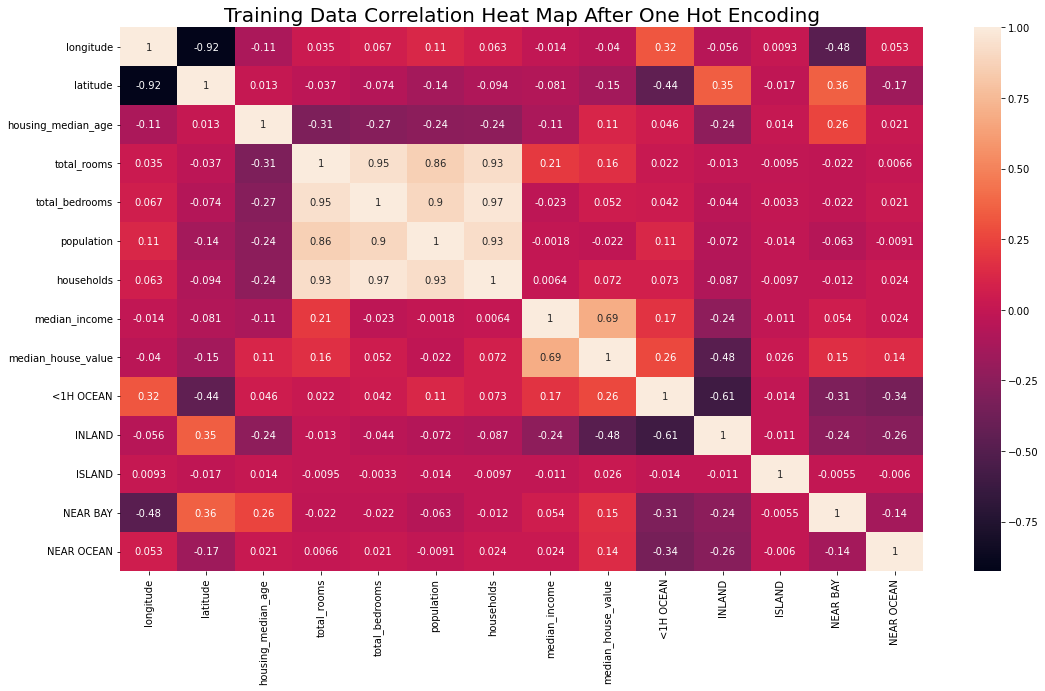

In [17]:
# Training data correlation heatmap with ocean proximity one hot encoded
plt.figure(figsize=(18,10))
sns.heatmap(train_data.corr(), annot=True, cmap='rocket')
plt.title("Training Data Correlation Heat Map After One Hot Encoding", fontsize=20)
plt.show()

**Below you can see a scatterplot of the median house values in California. The more the color transitions from dark blue towards dark red indicates higher housing prices. Although not a map of California, the scatterplot follows the general shape of the state, with the most expensive areas being San Francisco and Los Angeles. This is also indicative of housing being more expensive the closer to the water it is.**

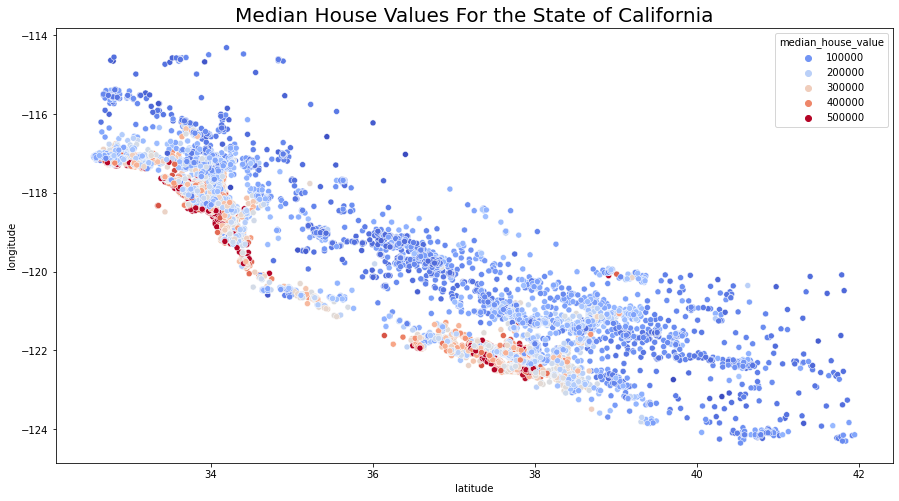

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')
plt.title('Median House Values For the State of California', fontsize=20)
plt.show()

### Feature Engineering: Finding Bedroom Ratio and Household Rooms From Our Data

In [19]:
# Creating new insights from our improve processed data
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']


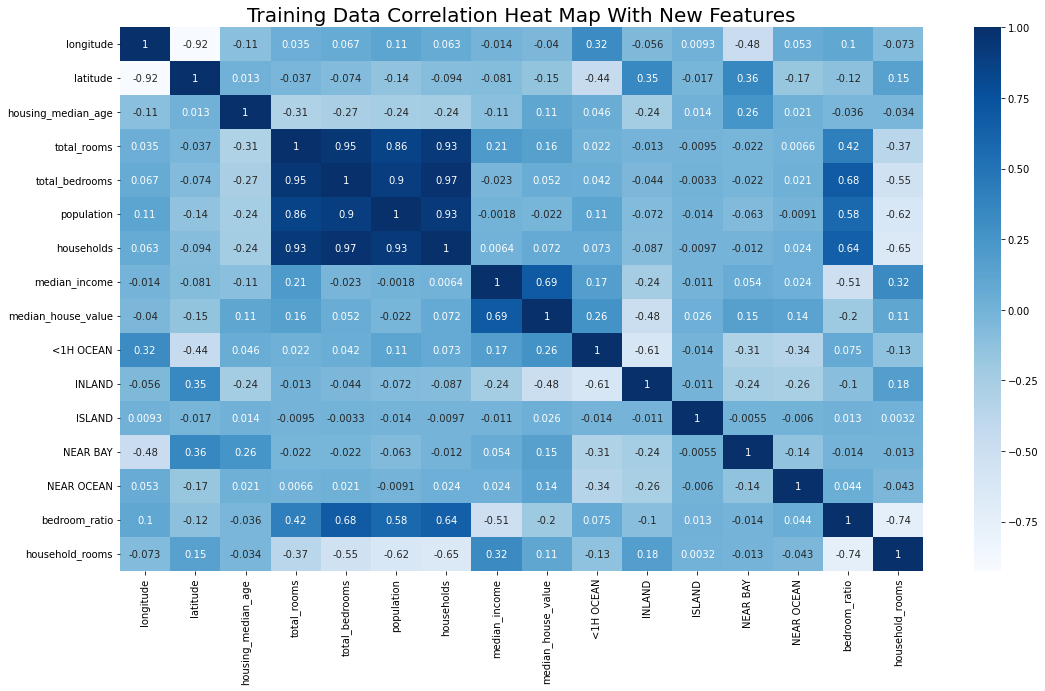

In [20]:
#heatmap with addition of new columns bedroom_ratio and household_rooms
plt.figure(figsize=(18,10))
sns.heatmap(train_data.corr(), annot=True, cmap="Blues")
plt.title("Training Data Correlation Heat Map With New Features", fontsize=20)
plt.show()

### Linear Regression Model

In [21]:
#Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler() # scale data

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [22]:
# Using Test data now
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [23]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [24]:
X_test_s = scaler.transform(X_test)

### Measure of how well the model's predictions match the actual data by Linear Regresson

In [25]:
# Test R^2 with regression model
reg.score(X_test_s, y_test)

0.6657375324112265

### Random Forest Regressor

In [26]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

### Measure of how well the model's predictions match the actual data by Random Forest Regression

In [27]:
# Test R^2 with Random Forest Model
forest.score(X_test_s, y_test)

0.8130370891609295

### Grid Search: Hyperparameter Fine-Tuning 

In [28]:
# Gridsearch for higher accuracy (cross-validation)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 50, 100],
    'min_samples_split': [2, 4],
    'max_depth': [2, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [5, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}


In [30]:
best_forest = grid_search.best_estimator_

### Measure of how well the model's predictions match the actual data by Random Forest Regression with Hyperparameter Fine-Tuning

In [31]:
best_forest.score(X_test_s, y_test)

0.7422669951584459

### The Random Forest Regression model achieved an R² score of 0.81, indicating it explains 81% of the variance in the target variable, while the Linear Regression model achieved an R² score of 0.67, explaining 67% of the variance. This suggests the Random Forest model performs better at predicting the target variable in this case than the Linear Regression model. It was interesting to see that using GridSearchCV actually reduced our prediction measure for the Random Forest Regression model instead of improving it by produce an R² score of 0.74 or 74%.